<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Get-the-information-from-the-QUOTEAPI" data-toc-modified-id="Get-the-information-from-the-QUOTEAPI-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get the information from the QUOTEAPI</a></span></li><li><span><a href="#Tokenization" data-toc-modified-id="Tokenization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tokenization</a></span></li><li><span><a href="#Translating" data-toc-modified-id="Translating-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Translating</a></span></li><li><span><a href="#Stop-words" data-toc-modified-id="Stop-words-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Stop words</a></span></li><li><span><a href="#Sentiment-Analysis" data-toc-modified-id="Sentiment-Analysis-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Sentiment Analysis</a></span><ul class="toc-item"><li><span><a href="#Sentimental-Analysis-II" data-toc-modified-id="Sentimental-Analysis-II-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Sentimental Analysis II</a></span></li></ul></li></ul></div>

## Objectives

In this jupyter two sentiment analyzes have been carried out based on the data obtained from the database of the QuoteAPI project:

1. Evaluate if there are differences between categories and sex the citations in the database

2. Select those authors who had the most citations in our API and evaluate the sensitivity of their citations

## Libraries

In [8]:
import sys
sys.path.append('../')

In [1]:
import pandas as pd
import requests
#NLTK
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

#TextBlob
from textblob import TextBlob

#SpaCy
import spacy
from spacy import displacy

from langdetect import detect
import seaborn as sns

## Get the information from the QUOTEAPI 

In [24]:
url = ("http://127.0.0.1:5000/Data")

In [25]:
all_aut =  requests.get(url)
all_aut.status_code

200

In [26]:
data = all_aut.json()

In [27]:
df = pd.DataFrame(data)
df

,Author,Category,Gender,Quote
0,Antonie van Leeuwenhoek,science,M,I believe that thirty million of these animalc...
1,Richard Dawkins,science,M,Biology is the study of the complex things in ...
2,J. B. S. Haldane,science,M,"If physics and biology one day meet, and one o..."
3,Aristotle,science,M,"By �life,� we mean a thing that can nourish it..."
4,Har Gobind Khorana,science,M,Everything that human beings or living animals...
...,...,...,...,...
195,George Eliot,literature,M,"Babies, babies, babies. Why did God make so ma..."
196,Geoffrey Chaucer,literature,M,"Her heart of compressed ash, which had resiste..."
197,Dante Alighieri,literature,M,"Jim said that bees won�t sting idiots, but I d..."
198,Alberto,NaN,M,que duras son las APIs


In [28]:
df.to_csv('Data_SA.csv',index = False) 

In [29]:
df = pd.read_csv("Data_SA.csv")

## Tokenization 

In [30]:
def tokenize (string):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(string)
    return tokens

In [31]:
df["Quote_tok"] = df["Quote"].apply(tokenize)

In [32]:
df.head()

,Author,Category,Gender,Quote,Quote_tok
0,Antonie van Leeuwenhoek,science,M,I believe that thirty million of these animalc...,"[I, believe, that, thirty, million, of, these,..."
1,Richard Dawkins,science,M,Biology is the study of the complex things in ...,"[Biology, is, the, study, of, the, complex, th..."
2,J. B. S. Haldane,science,M,"If physics and biology one day meet, and one o...","[If, physics, and, biology, one, day, meet, an..."
3,Aristotle,science,M,"By �life,� we mean a thing that can nourish it...","[By, life, we, mean, a, thing, that, can, nour..."
4,Har Gobind Khorana,science,M,Everything that human beings or living animals...,"[Everything, that, human, beings, or, living, ..."


In [33]:
df['Quote_tok'] = df['Quote_tok'].apply(lambda x: " ".join(x))
df.head()

,Author,Category,Gender,Quote,Quote_tok
0,Antonie van Leeuwenhoek,science,M,I believe that thirty million of these animalc...,I believe that thirty million of these animalc...
1,Richard Dawkins,science,M,Biology is the study of the complex things in ...,Biology is the study of the complex things in ...
2,J. B. S. Haldane,science,M,"If physics and biology one day meet, and one o...",If physics and biology one day meet and one of...
3,Aristotle,science,M,"By �life,� we mean a thing that can nourish it...",By life we mean a thing that can nourish itsel...
4,Har Gobind Khorana,science,M,Everything that human beings or living animals...,Everything that human beings or living animals...


## Translating

In [34]:
def intoEnglish(string):
    spanish_string = TextBlob(string)
    try:
        english_blob=spanish_string.translate(from_lang='es',to='en')
        return "".join(list(english_blob))
    except:
        return string

In [35]:
df['Quote_tok'] = df["Quote_tok"].apply(intoEnglish)

In [36]:
df.head()

,Author,Category,Gender,Quote,Quote_tok
0,Antonie van Leeuwenhoek,science,M,I believe that thirty million of these animalc...,I believe that thirty million of these animalc...
1,Richard Dawkins,science,M,Biology is the study of the complex things in ...,Biology is the study of the complex things in ...
2,J. B. S. Haldane,science,M,"If physics and biology one day meet, and one o...",If physics and biology one day meet and one of...
3,Aristotle,science,M,"By �life,� we mean a thing that can nourish it...",By life we mean a thing that can nourish itsel...
4,Har Gobind Khorana,science,M,Everything that human beings or living animals...,Everything that human beings or living animals...


## Stop words

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anagarcia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/anagarcia/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [39]:
stop_words = set(stopwords.words('english'))

In [40]:
df["Quote_tok"] = df["Quote_tok"].apply(lambda x: x.split(" "))

In [41]:
def stop_words (lista):
    stop_words = set(stopwords.words('english'))
    nueva_lista = []
    for string in lista:
        if string not in stop_words:
            nueva_lista.append(string)
    return " ".join(nueva_lista)

In [42]:
df["Quote_tok"] = df["Quote_tok"].apply(stop_words)

In [43]:
df.head()

,Author,Category,Gender,Quote,Quote_tok
0,Antonie van Leeuwenhoek,science,M,I believe that thirty million of these animalc...,I believe thirty million animalcules together ...
1,Richard Dawkins,science,M,Biology is the study of the complex things in ...,Biology study complex things Universe Physics ...
2,J. B. S. Haldane,science,M,"If physics and biology one day meet, and one o...",If physics biology one day meet one two swallo...
3,Aristotle,science,M,"By �life,� we mean a thing that can nourish it...",By life mean thing nourish grow decay
4,Har Gobind Khorana,science,M,Everything that human beings or living animals...,Everything human beings living animals done pr...


## Sentiment Analysis

In [44]:
def sentimentAnalysis(sentence):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(sentence)
    pol = polarity['compound']
    return pol

In [45]:
df['SA'] = df["Quote_tok"].apply(sentimentAnalysis)
df.head(5)

,Author,Category,Gender,Quote,Quote_tok,SA
0,Antonie van Leeuwenhoek,science,M,I believe that thirty million of these animalc...,I believe thirty million animalcules together ...,0.0000
1,Richard Dawkins,science,M,Biology is the study of the complex things in ...,Biology study complex things Universe Physics ...,0.0000
2,J. B. S. Haldane,science,M,"If physics and biology one day meet, and one o...",If physics biology one day meet one two swallo...,0.0000
3,Aristotle,science,M,"By �life,� we mean a thing that can nourish it...",By life mean thing nourish grow decay,-0.4019
4,Har Gobind Khorana,science,M,Everything that human beings or living animals...,Everything human beings living animals done pr...,0.7964


In [63]:
df2 = df.groupby(['Category','Gender'], as_index=False).mean()
df2

,Category,Gender,SA
0,Literature,F,0.283856
1,Literature,M,0.000000
2,literature,F,0.230853
3,literature,M,0.015943
4,philosophy,F,-0.057160
5,philosophy,M,0.139058
6,science,F,0.114700
7,science,M,0.192505


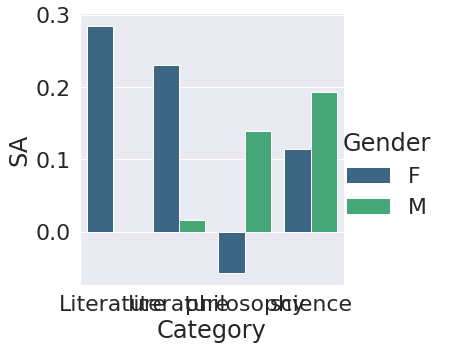

In [64]:
fig = sns.catplot(x="Category", y="SA", hue="Gender", kind="bar", palette = "viridis", data=df2)

In [48]:
fig.savefig("Sentimental_Analysis.png")

###  Sentimental Analysis II
Finally I have selected those authors who had more than two citations in the API and I will do a sentiment analysis by author

In [54]:
df2 = pd.read_csv("../Output/Data_SA.csv")

In [55]:
df2['counts'] = df2.groupby('Author')['Author'].transform('count')
df2_rep = df2[df2.counts >2]
df2_rep.head()

,Author,Category,Gender,Quote,counts
24,Margarita Salas,NaN,F,La mujer ocupará en el mundo científico el pue...,4
25,Margarita Salas,NaN,F,"Si los jóvenes se van de España, su vuelta es ...",4
26,Margarita Salas,NaN,F,Si se van es imposible que vuelvan,4
29,Margarita Salas,NaN,F,Lo importante es no tener arrugas en el cerebro,4
30,Socrates,philosophy,M,The unexamined life is not worth living,3


In [56]:
df2_rep["Quote_tok"] = df2_rep["Quote"].apply(tokenize)

<ipython-input-56-17426357c6cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_rep["Quote_tok"] = df2_rep["Quote"].apply(tokenize)


In [57]:
df2_rep['Quote_tok'] = df2_rep['Quote_tok'].apply(lambda x: " ".join(x))


<ipython-input-57-2d9d8812cb9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_rep['Quote_tok'] = df2_rep['Quote_tok'].apply(lambda x: " ".join(x))


In [58]:
df2_rep['Quote_tok'] = df2_rep["Quote_tok"].apply(intoEnglish)

<ipython-input-58-455e5fedfd7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_rep['Quote_tok'] = df2_rep["Quote_tok"].apply(intoEnglish)


In [59]:
df2_rep['SA'] = df2_rep["Quote_tok"].apply(sentimentAnalysis)

<ipython-input-59-90c788b7f70e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_rep['SA'] = df2_rep["Quote_tok"].apply(sentimentAnalysis)


In [60]:
df2_rep.groupby(('Author'), as_index=False).mean()

,Author,counts,SA
0,Aristotle,4,0.508750
1,Bertrand Russell,4,0.076800
2,G. W. F. Hegel,3,0.226933
3,Immanuel Kant,3,0.189200
4,John Locke,5,-0.229740
5,Ludwig Wittgenstein,3,0.346300
6,Rene Descartes,3,-0.128100
7,Socrates,3,-0.260633
8,Edith Wharton,3,-0.234233
9,Jane Austen,6,0.459883


/home/anagarcia/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


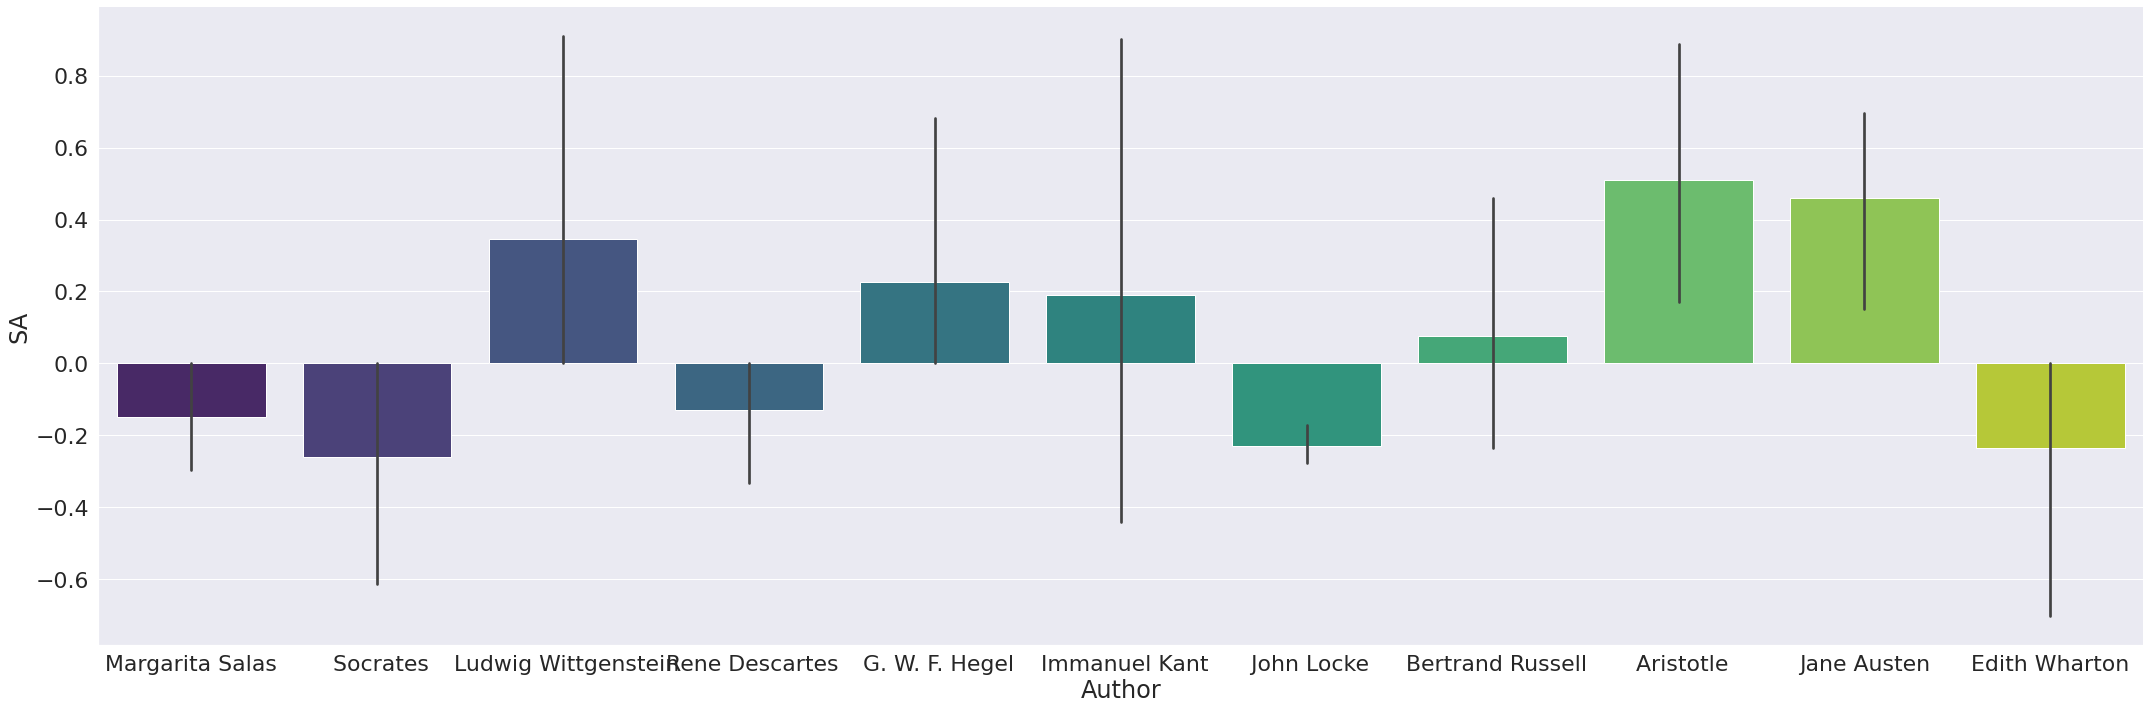

In [61]:
sns.set(font_scale=2)
fig2 = sns.catplot(x="Author", y="SA",  kind="bar", palette = "viridis",size=10, aspect=3, data=df2_rep)

In [54]:
fig2.savefig("Sentimental_Analysis_MostPopular.png")